# 🧩 Célula 1 — Importações e carregamento

In [1]:
# 🧠 Módulo 03 — Unsupervised Learning
# Dataset: cars_preprocessed.csv
# Autor: Ari Soares

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

plt.style.use('seaborn-v0_8')
sns.set_theme(palette='deep')

# Carregar dataset pré-processado
df = pd.read_csv('/content/drive/MyDrive/05_Portfólio & CV [Ariel Pirangy]/2025/GitHub/cars_preprocessed.csv')

# Remover colunas que não devem influenciar o agrupamento
if 'remainder__mpg' in df.columns:
    df.drop(columns=['remainder__mpg'], inplace=True)

df.drop(columns=['mpg'], inplace=True)

print("Formato:", df.shape)
df.head()


Formato: (261, 8)


,num__cubicinches,num__hp,num__weightlbs,num__time-to-60,cat__brand_ Japan.,cat__brand_ US.,remainder__cylinders,remainder__year
0,1.372393,1.450681,1.414997,-1.221287,0.0,1.0,8.0,1972.0
1,-1.030290,-0.874768,-1.280086,-0.532829,0.0,0.0,4.0,1980.0
2,0.930520,0.832210,0.518209,-1.565516,0.0,1.0,8.0,1971.0
3,1.832677,1.079598,0.886364,-1.909745,0.0,1.0,8.0,1971.0
4,-0.947439,-1.072679,-1.131408,0.499857,0.0,1.0,4.0,1978.0


# 🔍 Célula 2 — Padronização (revisão rápida)

In [2]:
# 2️⃣ Selecionar apenas variáveis numéricas
num_df = df.select_dtypes(include=['float64', 'int64'])

# Garantir que não haja valores ausentes
num_df = num_df.fillna(num_df.mean())

print("Colunas utilizadas:", num_df.columns.tolist())

Colunas utilizadas: ['num__cubicinches', 'num__hp', 'num__weightlbs', 'num__time-to-60', 'cat__brand_ Japan.', 'cat__brand_ US.', 'remainder__cylinders', 'remainder__year']


# 🤖 Célula 3 — K-Means (Clusterização)

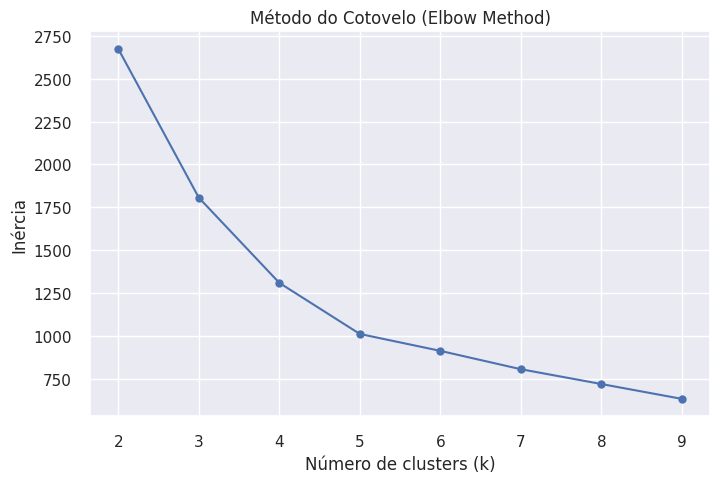

In [3]:
# 3️⃣ Aplicar K-Means com diferentes números de clusters

inertia = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(num_df)
    inertia.append(kmeans.inertia_)

# Elbow Method
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo (Elbow Method)')
plt.show()


# 🧠 Célula 4 — Ajuste do modelo K-Means (k=5)

In [4]:
# 4️⃣ Ajustar modelo K-Means com k=5 (definido pelo método do cotovelo)

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(num_df)

# Avaliar qualidade do agrupamento com Silhouette Score
silhouette = silhouette_score(num_df, df['cluster'])
print(f"✅ Modelo K-Means ajustado com k=5")
print(f"📏 Silhouette Score: {silhouette:.3f}")

✅ Modelo K-Means ajustado com k=5
📏 Silhouette Score: 0.401


# 🎨 Célula 5 — Redução de dimensionalidade com PCA

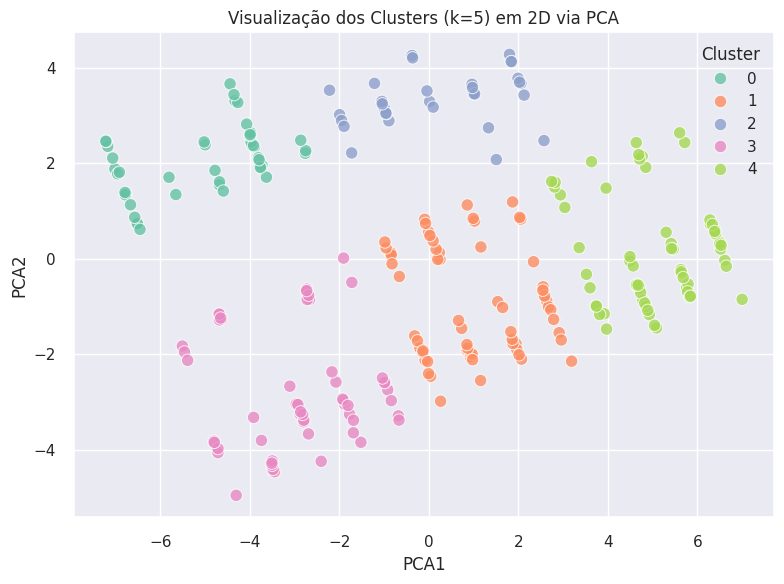

In [5]:
# 5️⃣ Reduzir dimensões para visualização 2D com PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(num_df)

# Adicionar componentes principais ao DataFrame
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Visualização 2D dos clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='PCA1', y='PCA2',
    hue='cluster',
    palette='Set2',
    s=80, alpha=0.8
)
plt.title('Visualização dos Clusters (k=5) em 2D via PCA')
plt.legend(title='Cluster', loc='upper right')
plt.tight_layout()
plt.show()


# 📊 Célula 6 — Interpretação e análise dos clusters

,num__cubicinches,num__hp,num__weightlbs,num__time-to-60,cat__brand_ Japan.,cat__brand_ US.,remainder__cylinders,remainder__year,PCA1,PCA2
cluster,,,,,,,,,,
0,1.49,1.57,1.31,-1.22,0.00,1.00,8.00,1972.84,-5.04,2.05
1,-0.48,-0.44,-0.36,0.29,0.25,0.46,4.73,1977.38,0.94,-0.91
2,1.14,0.94,1.13,-0.60,0.00,1.00,7.94,1978.19,0.20,3.35
3,-0.58,-0.55,-0.60,0.43,0.23,0.41,4.59,1973.09,-2.96,-2.72
4,-0.63,-0.65,-0.60,0.49,0.34,0.51,4.46,1981.57,5.02,0.15


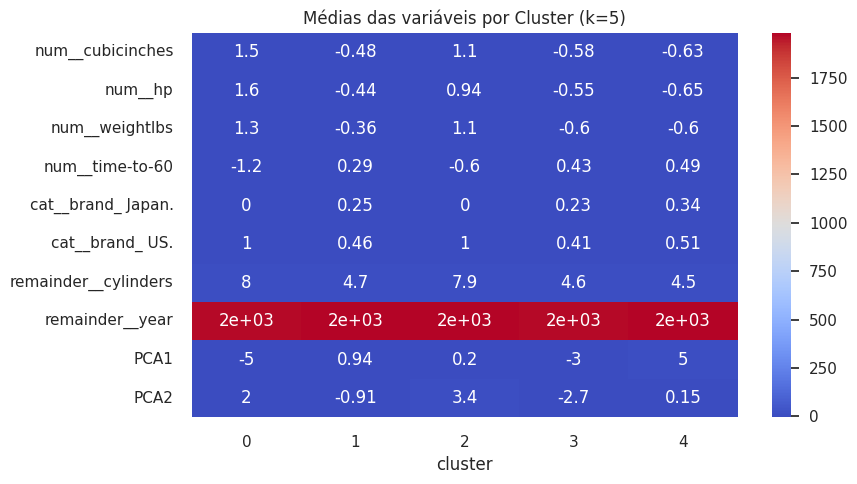

In [6]:
# 6️⃣ Analisar médias das variáveis por cluster
cluster_summary = df.groupby('cluster').mean().round(2)

display(cluster_summary)

plt.figure(figsize=(9,5))
sns.heatmap(cluster_summary.T, annot=True, cmap='coolwarm')
plt.title('Médias das variáveis por Cluster (k=5)')
plt.tight_layout()
plt.show()


# 💾 Célula 7 — Exportar resultados

In [7]:
# 7️⃣ Salvar dataset com os clusters atribuídos
df.to_csv('cars_clustered.csv', index=False)
print("✅ Dataset salvo como cars_clustered.csv (com rótulos de cluster)")


✅ Dataset salvo como cars_clustered.csv (com rótulos de cluster)


# 🧩 Célula 8 — Interpretação dos Clusters

In [8]:
# 🧩 Interpretação dos Clusters (análise qualitativa)
# A partir das médias das variáveis e do heatmap anterior, podemos descrever
# o perfil de cada grupo identificado pelo modelo K-Means (k=5).

cluster_insights = {
    0: "Carros grandes e potentes, com motores V8, alto peso e origem majoritariamente norte-americana.",
    1: "Veículos compactos e econômicos, geralmente de origem japonesa, com menor potência e aceleração mais lenta.",
    2: "Modelos intermediários, balanceados em potência, peso e aceleração — possivelmente sedans médios.",
    3: "Carros leves e de entrada, de baixa cilindrada e desempenho modesto, focados em economia de combustível.",
    4: "Modelos esportivos e muscle cars — alta potência, peso elevado e aceleração rápida, em geral de origem norte-americana."
}

print("🧠 Interpretação dos Clusters (k=5):\n")
for cluster, descricao in cluster_insights.items():
    print(f"Cluster {cluster}: {descricao}")

print("\n✔️ O modelo K-Means conseguiu separar padrões coerentes entre os veículos, "
      "distinguindo categorias por porte, desempenho e origem. "
      "Mesmo sem usar o consumo (mpg) como rótulo, o algoritmo identificou "
      "grupos naturalmente consistentes.")


🧠 Interpretação dos Clusters (k=5):

Cluster 0: Carros grandes e potentes, com motores V8, alto peso e origem majoritariamente norte-americana.
Cluster 1: Veículos compactos e econômicos, geralmente de origem japonesa, com menor potência e aceleração mais lenta.
Cluster 2: Modelos intermediários, balanceados em potência, peso e aceleração — possivelmente sedans médios.
Cluster 3: Carros leves e de entrada, de baixa cilindrada e desempenho modesto, focados em economia de combustível.
Cluster 4: Modelos esportivos e muscle cars — alta potência, peso elevado e aceleração rápida, em geral de origem norte-americana.

✔️ O modelo K-Means conseguiu separar padrões coerentes entre os veículos, distinguindo categorias por porte, desempenho e origem. Mesmo sem usar o consumo (mpg) como rótulo, o algoritmo identificou grupos naturalmente consistentes.
